# Investigating the data for House Price Predictions

## Importing the data

In [1]:
import pandas as pd

In [2]:
pd.set_option('display.max_colwidth', None)

In [3]:
pickle_file = r'C:\Users\psydp2\OneDrive - The University of Nottingham\Year 2\Group Project\GitHub\uon-dsda-22-y2-group-project-team-1\investigations\all_houses_for_sale.pickle'

In [4]:
pickle_file

'C:\\Users\\psydp2\\OneDrive - The University of Nottingham\\Year 2\\Group Project\\GitHub\\uon-dsda-22-y2-group-project-team-1\\investigations\\all_houses_for_sale.pickle'

In [5]:
df = pd.read_pickle(pickle_file)

In [6]:
df

,property_id,description,price,beds,baths,branch,post code,property type
0,property_2100301781,"3 bedroom End Terrace House for sale, Greening Street, London, SE2","£582,000",3,1,Abbey Wood,SE2,flat
1,property_2100301781,"3 bedroom End Terrace House for sale, Greening Street, London, SE2","£582,000",3,1,Abbey Wood,SE2,flat
2,property_2100326650,"3 bedroom Mid Terrace House for sale, Basildon Road, London, SE2","£475,000",3,1,Abbey Wood,SE2,flat
3,property_2100325739,"3 bedroom Mid Terrace House for sale, Redbourne Drive, London, SE28","£450,000",3,3,Abbey Wood,SE28,flat
4,property_2100325532,"3 bedroom Mid Terrace House for sale, Bracondale Road, London, SE2","£425,000",3,1,Abbey Wood,SE2,flat
...,...,...,...,...,...,...,...,...
4097,property_2100253095,"3 bedroom End Terrace House for sale, Byland Avenue, York, YO31","£225,000",3,1,York,YO31,flat
4098,property_2100253095,"3 bedroom End Terrace House for sale, Byland Avenue, York, YO31","£225,000",3,1,York,YO31,flat
4099,property_2100251715,"2 bedroom Flat for sale, Ashfield Court, York, YO24","£220,000",2,1,York,YO24,flat
4100,property_2100321230,"2 bedroom Semi Detached House for sale, Woodside Avenue, York, North Yorkshire, YO31","£210,000",2,1,York,YO31,flat


In [7]:
df['city'] = df['description'].str.split(',').str[-2].str.strip()
df['street'] = df['description'].str.split(',').str[-3].str.strip()

In [8]:
df

,property_id,description,price,beds,baths,branch,post code,property type,city,street
0,property_2100301781,"3 bedroom End Terrace House for sale, Greening Street, London, SE2","£582,000",3,1,Abbey Wood,SE2,flat,London,Greening Street
1,property_2100301781,"3 bedroom End Terrace House for sale, Greening Street, London, SE2","£582,000",3,1,Abbey Wood,SE2,flat,London,Greening Street
2,property_2100326650,"3 bedroom Mid Terrace House for sale, Basildon Road, London, SE2","£475,000",3,1,Abbey Wood,SE2,flat,London,Basildon Road
3,property_2100325739,"3 bedroom Mid Terrace House for sale, Redbourne Drive, London, SE28","£450,000",3,3,Abbey Wood,SE28,flat,London,Redbourne Drive
4,property_2100325532,"3 bedroom Mid Terrace House for sale, Bracondale Road, London, SE2","£425,000",3,1,Abbey Wood,SE2,flat,London,Bracondale Road
...,...,...,...,...,...,...,...,...,...,...
4097,property_2100253095,"3 bedroom End Terrace House for sale, Byland Avenue, York, YO31","£225,000",3,1,York,YO31,flat,York,Byland Avenue
4098,property_2100253095,"3 bedroom End Terrace House for sale, Byland Avenue, York, YO31","£225,000",3,1,York,YO31,flat,York,Byland Avenue
4099,property_2100251715,"2 bedroom Flat for sale, Ashfield Court, York, YO24","£220,000",2,1,York,YO24,flat,York,Ashfield Court
4100,property_2100321230,"2 bedroom Semi Detached House for sale, Woodside Avenue, York, North Yorkshire, YO31","£210,000",2,1,York,YO31,flat,North Yorkshire,York


## Visualisation of the data

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df['price'] = df['price'].str.replace('£', '').str.replace(',', '')

In [11]:
df.drop(1667, inplace = True)

In [12]:
df['price'] = df['price'].astype(int)

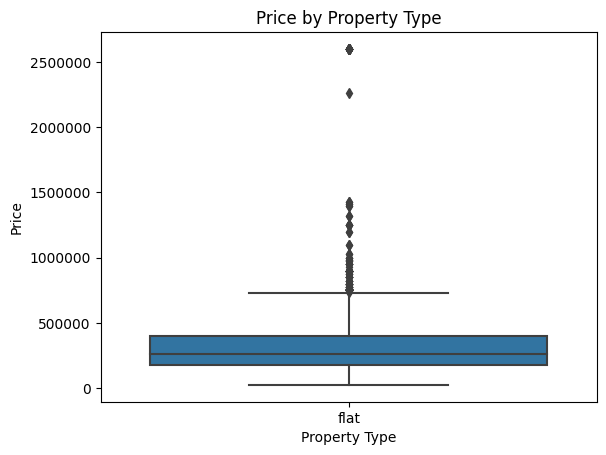

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='property type', y='price', data=df)
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.title('Price by Property Type')

# Set y-axis scale to display actual values
plt.ticklabel_format(style='plain', axis='y')  # Display full value without scientific notation

plt.show()

In [14]:
df['beds'] = df['beds'].astype(int)

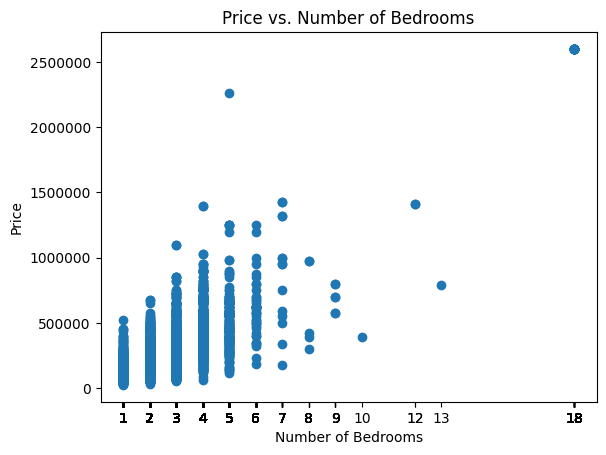

In [15]:
import matplotlib.pyplot as plt

sorted_df = df.sort_values('beds')
plt.scatter(sorted_df['beds'], sorted_df['price'])
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.title('Price vs. Number of Bedrooms')
plt.ticklabel_format(style='plain', axis='y')

# Set x-axis ticks as integers
plt.xticks(sorted_df['beds'].astype(int))

plt.show()

In [16]:
column_to_remove = ['property_id','description','post code','street']
df_without_column = df.drop(column_to_remove, axis=1)

In [17]:
df_without_column

,price,beds,baths,branch,property type,city
0,582000,3,1,Abbey Wood,flat,London
1,582000,3,1,Abbey Wood,flat,London
2,475000,3,1,Abbey Wood,flat,London
3,450000,3,3,Abbey Wood,flat,London
4,425000,3,1,Abbey Wood,flat,London
...,...,...,...,...,...,...
4097,225000,3,1,York,flat,York
4098,225000,3,1,York,flat,York
4099,220000,2,1,York,flat,York
4100,210000,2,1,York,flat,North Yorkshire


In [19]:
branchid = {}
for idx, name in enumerate(df_without_column['branch'].unique()):
    branchid[name] = idx
df_without_column['BranchNumber'] = df_without_column['branch'].map(branchid)

In [21]:
property_type = {}
for idx, name in enumerate(df_without_column['property type'].unique()):
    property_type[name] = idx
df_without_column['PropertyTypeNumber'] = df_without_column['property type'].map(property_type)

In [22]:
city = {}
for idx, name in enumerate(df_without_column['city'].unique()):
    city[name] = idx
df_without_column['CityNumber'] = df_without_column['city'].map(city)

In [23]:
columns_to_remove = ['branch','property type','city']
df_without_column = df_without_column.drop(columns_to_remove, axis = 1)

In [24]:
df_without_column

,price,beds,baths,BranchNumber,PropertyTypeNumber,CityNumber
0,582000,3,1,0,0,0
1,582000,3,1,0,0,0
2,475000,3,1,0,0,0
3,450000,3,3,0,0,0
4,425000,3,1,0,0,0
...,...,...,...,...,...,...
4097,225000,3,1,150,0,204
4098,225000,3,1,150,0,204
4099,220000,2,1,150,0,204
4100,210000,2,1,150,0,80


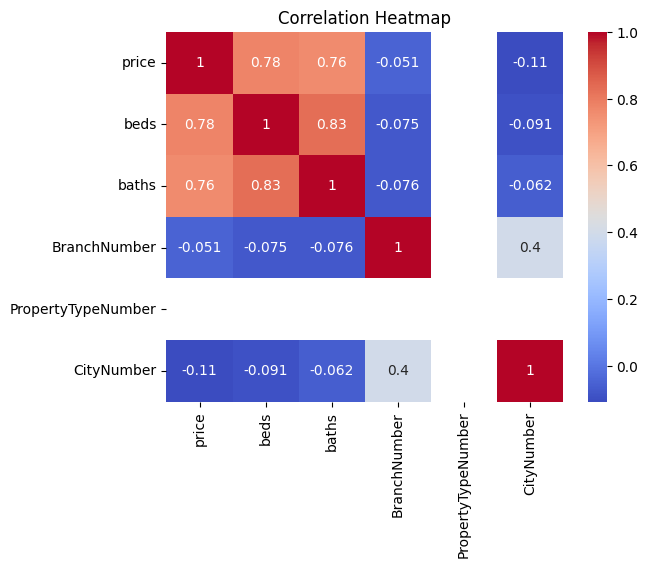

In [25]:
# Correlation Heatmap
corr_matrix = df_without_column.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()